In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from scipy.io import loadmat


In [3]:
def flatten_extend(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

#all_responses=flatten_extend(all_responses)


In [53]:
df =  pd.read_csv('data/054644_av_v_fle_2024-10-09_18h47.34.149.csv')
# Create a new column that will represent the audioDelayAimed in terms of ms
df['audioDelayAimed_ms'] = df['audioDelaysAimed']*16.6667
df['visualDelayAimed_ms'] = df['visualDelaysAimed']*16.6667
df['audioDelayReal_ms'] =(df["audioTime"]-df["flashTime"])*1000
df

,Unnamed: 0,responses,responseTimes,incidentTimesAimed,audioDelaysAimed,visualDelaysAimed,trialDurations,audioTime,flashTime,trialNum,flashPostionX,bar_at_flash_X,directions,audioDelayAimed_ms,visualDelayAimed_ms,audioDelayReal_ms
0,0,0,0.700363,0.788283,-8,0,1.314014,0.646513,0.780850,1,69.298650,69.298650,1,-133.3336,0.0000,-134.3370
1,1,0,1.101053,0.575754,6,2,1.314014,0.665167,0.565682,2,-67.714831,-49.452929,1,100.0002,33.3334,99.4847
2,2,0,0.583239,0.532710,0,5,1.314014,0.512877,0.512877,3,-123.473585,-77.818830,1,0.0000,83.3335,0.0000
3,3,0,0.467890,0.881885,10,0,1.314014,1.029093,0.861964,4,-113.820637,-113.820637,-1,166.6670,0.0000,167.1289
4,4,0,0.598590,0.729730,-10,2,1.314014,0.549592,0.714879,5,-14.176213,-32.438115,-1,-166.6670,33.3334,-165.2876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,235,0,0.518181,0.684465,6,5,1.314014,0.762842,0.662300,236,-41.388874,4.265880,1,100.0002,83.3335,100.5423
236,236,0,0.049670,0.462000,0,2,1.314014,0.448316,0.448316,237,131.802492,113.540590,-1,0.0000,33.3334,0.0000
237,237,1,0.181948,0.819889,-8,-2,1.314014,0.682671,0.814933,238,-105.694182,-87.432280,-1,-133.3336,-33.3334,-132.2618
238,238,0,0.314810,0.880300,10,0,1.314014,1.029204,0.862064,239,-113.702683,-113.702683,-1,166.6670,0.0000,167.1394


Text(0.5, 0, 'visualDelayAimed_ms')

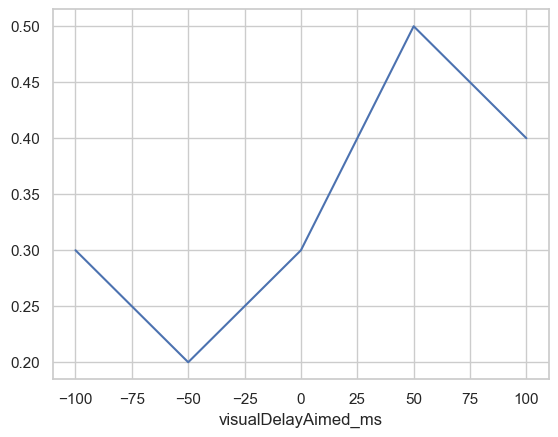

In [52]:
# filter df to visualDelayAimed = 0
df["audioDelayAimed_ms"] = df["audioDelayAimed_ms"].astype(int)
df_zero=df[df["audioDelayAimed_ms"]==0]

# group by audioDelayAimed_ms and calculate mean of audioDelayReal_ms
df_zero_grouped = df_zero.groupby('visualDelaysAimed').mean()


# plot responses as a function of visualDelayAimed_ms
plt.plot(df_zero_grouped["visualDelayAimed_ms"], df_zero_grouped["responses"] )
plt.xlabel('visualDelayAimed_ms')
# plt.ylabel('audioDelayReal_ms')
# plt.title('audioDelayReal_ms as a function of visualDelayAimed_ms')



In [59]:
# Load data loadmat
data = loadmat('data/874707_av_v_fle_2024-10-09_12h54.02.373.mat')
   
# Zip the arrays to the shortest length
zipped_data = list(zip(data["responses"], data["responseTimes"], data["incidentTimesAimed"], data["audioDelaysAimed"], data["visualDelaysAimed"], data["trialDurations"], data["audioTime"], data["flashTime"], data["trialNum"]))
# Unzip the data back into individual lists
all_responses, responseTimes, incidentTimes, audioDelays, visualDelays, trial_durs, audioTime, flashTime, trialNum = map(list, zip(*zipped_data))
df = pd.DataFrame({
    'responses': flatten_extend(all_responses),
    'responseTimes': flatten_extend(responseTimes),
    'incidentTimesAimed': flatten_extend(incidentTimes),
    'audioDelaysAimed': flatten_extend(audioDelays),
    'visualDelaysAimed': flatten_extend(visualDelays),
    'trialDurations': flatten_extend(trial_durs),
    'audioTime': flatten_extend(audioTime),
    'flashTime': flatten_extend(flashTime),
    'trialNum': flatten_extend(trialNum)
})

In [60]:
df

,responses,responseTimes,incidentTimesAimed,audioDelaysAimed,visualDelaysAimed,trialDurations,audioTime,flashTime,trialNum
0,0,0.876041,0.867255,-1,0,1.314014,0.814313,0.830827,1
1,0,0.396931,0.661106,0,-2,1.314014,0.580782,0.580782,2
2,0,0.545424,0.692604,3,-4,1.314014,0.629152,0.579116,3
3,0,0.260357,0.690887,3,4,1.314014,0.763413,0.713278,4
4,1,0.313373,0.510160,-3,-2,1.314014,0.381849,0.437572,5
...,...,...,...,...,...,...,...,...,...
245,0,0.311638,0.695192,0,-4,1.314014,0.580521,0.580521,246
246,0,0.761964,0.881870,0,0,1.314014,0.847070,0.847070,247
247,0,0.145155,0.504913,3,-2,1.314014,0.481715,0.432225,248
248,0,0.177258,0.680330,1,4,1.314014,0.715263,0.698369,249


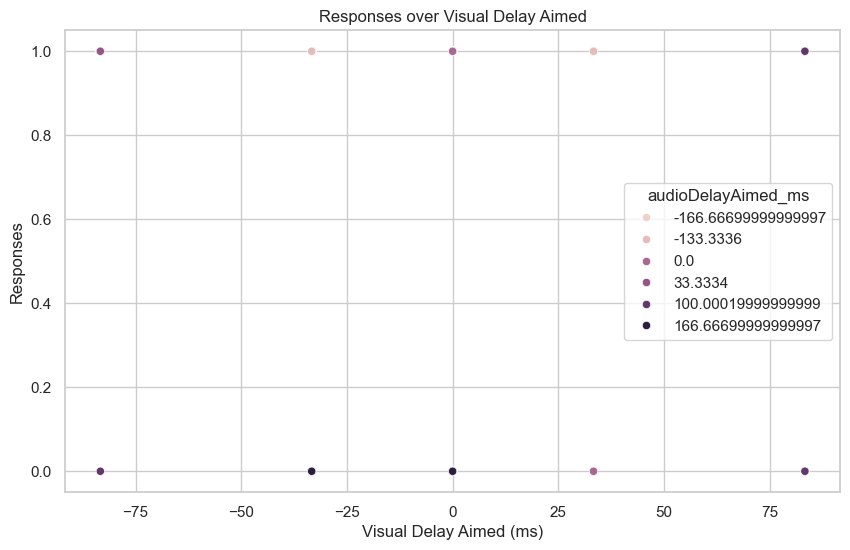

In [54]:
# Df includes responses, responseTimes, incidentTimesAimed, audioDelaysAimed, visualDelaysAimed, trialDurations, audioTime, flashTime, trialNum
# Responses are the key variable of interest
# audioDelaysAimed and visualDelaysAimed are the delays between the incident time of stimuli in terms of frames +1 means 16ms delay

# we need to plot the responses over VisualDelayAimed but we also need to consider the audioDelayAimed
# So that on X axis we have the visualDelayAimed and on Y axis we have the responses and the audioDelayAimed is represented by the color of the points

import matplotlib.pyplot as plt
import seaborn as sns


# compute audioDelay Relative to Visual timing

#df["relative_AV_delay_ms"]=df['audioDelayAimed_ms']-df['visualDelayAimed_ms']

# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='visualDelayAimed_ms', y='responses', hue='audioDelayAimed_ms', data=df)
plt.xlabel('Visual Delay Aimed (ms)')
plt.ylabel('Responses')
plt.title('Responses over Visual Delay Aimed')
plt.show()


C:\Users\omeru\AppData\Local\Temp\ipykernel_35104\4199628921.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='visualDelayAimed_ms', y='responses', hue='audioDelayAimed_ms', data=grouped_data, ci=None, legend=False)


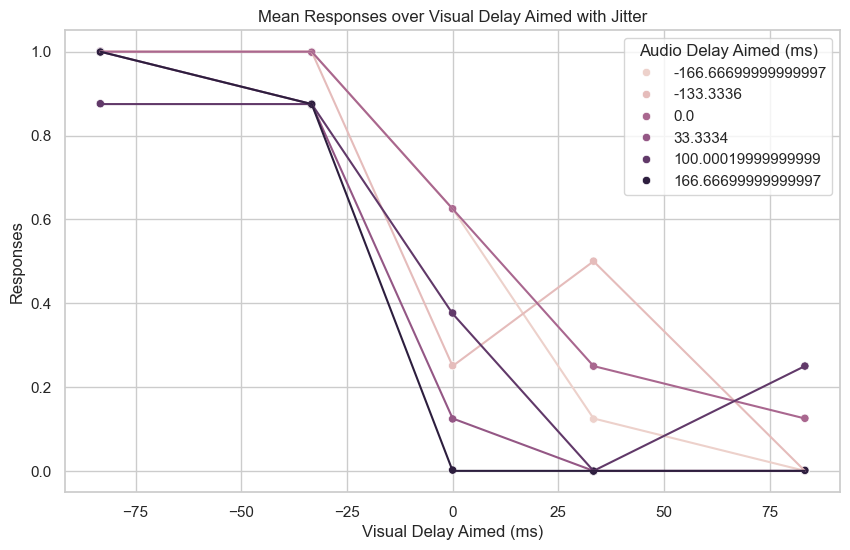

In [58]:

# now plot the mean responses for each visual delay aimed and audio delay aimed
# Group the data by visualDelayAimed and audioDelayAimed and calculate the mean of responses
grouped_data = df.groupby(['visualDelayAimed_ms', 'audioDelayAimed_ms']).mean().reset_index()
grouped_data


# Assuming 'responses' is already in the grouped_data DataFrame
# Create a jitter effect
jitter_strength = .001 # Adjust as needed
grouped_data['visualDelayAimed_ms_jittered'] = grouped_data['visualDelayAimed_ms'] + np.random.normal(0, jitter_strength, size=len(grouped_data))
grouped_data['responses_jittered'] = grouped_data['responses'] + np.random.normal(0, jitter_strength, size=len(grouped_data))

# Plot the data with jitter
plt.figure(figsize=(10, 6))
sns.scatterplot(x='visualDelayAimed_ms_jittered', y='responses_jittered', hue='audioDelayAimed_ms', data=grouped_data)
# connect the points with lines
sns.lineplot(x='visualDelayAimed_ms', y='responses', hue='audioDelayAimed_ms', data=grouped_data, ci=None, legend=False)
plt.xlabel('Visual Delay Aimed (ms)')
plt.ylabel('Responses')
#plt.ylim(0, 1)
plt.title('Mean Responses over Visual Delay Aimed with Jitter')
plt.legend(title='Audio Delay Aimed (ms)')
plt.show()

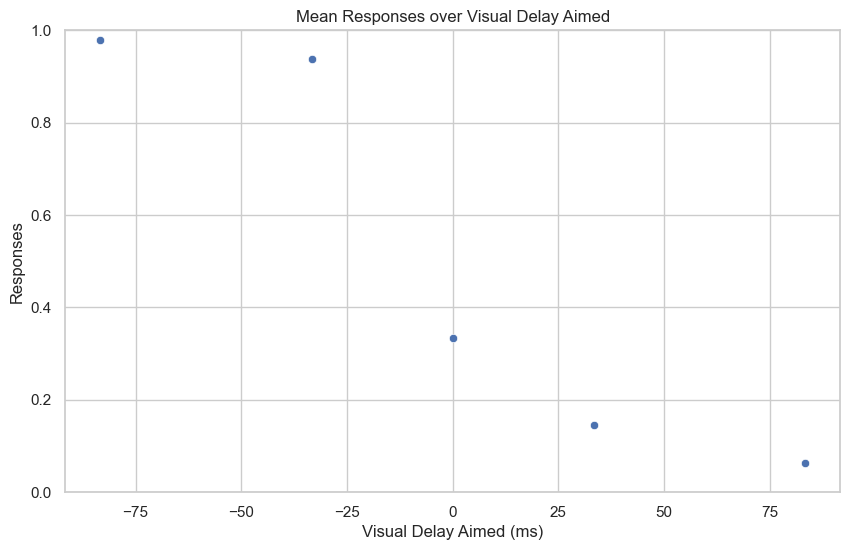

In [56]:
# Now plot only the mean responses for each visual delay aimed
# Group the data by visualDelayAimed and calculate the mean of responses
grouped_data = df.groupby('visualDelayAimed_ms').mean().reset_index()
grouped_data

# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='visualDelayAimed_ms', y='responses', data=grouped_data)
plt.xlabel('Visual Delay Aimed (ms)')
plt.ylabel('Responses')
plt.title('Mean Responses over Visual Delay Aimed')
plt.ylim(0,1)
plt.show()



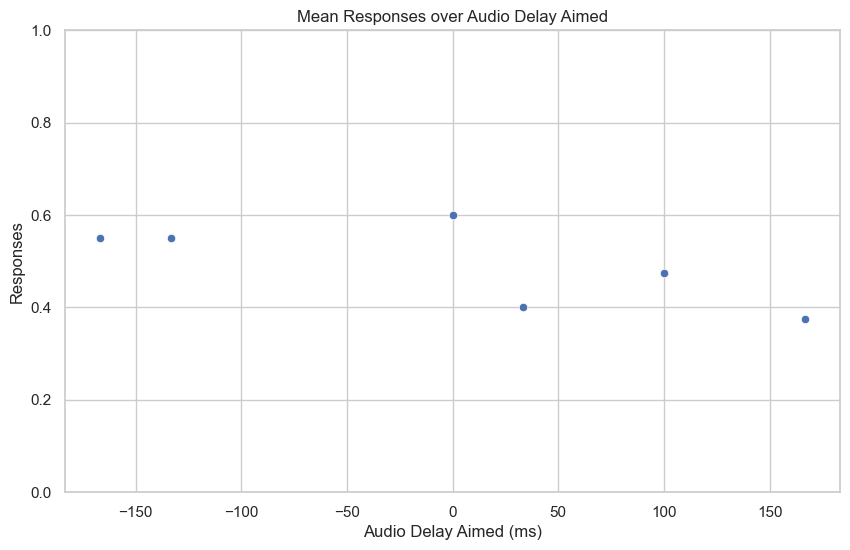

In [57]:
# Now plot the mean responses for only audio delay aimed
# Group the data by audioDelayAimed and calculate the mean of responses
grouped_data = df.groupby('audioDelayAimed_ms').mean().reset_index()
grouped_data
 
# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='audioDelayAimed_ms', y='responses', data=grouped_data)
plt.xlabel('Audio Delay Aimed (ms)')
plt.ylabel('Responses')
plt.title('Mean Responses over Audio Delay Aimed')
plt.ylim(0,1)
plt.show()

